<a href="https://colab.research.google.com/github/Umercia/wind_power/blob/master/wind_farm_power_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive from MyGoogleDrive
from google.colab import drive  
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.0 Import DATA


## 1.1 Import MERRA DATA

In [3]:
# importing
path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/"
filename = "MERRA2_N48.000_E001.250.txt"
file_path = path + filename
merra_df = pd.read_csv(file_path, 
                 sep = r"	", 
                 skiprows= 24, 
                 index_col='TimeStamp', 
                 parse_dates=True)
merra_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MeanWindSpeedUID_50.0m|Mean wind speed|L-1.00|U75.00,DirectionUID_50.0m|Wind direction|L0.00|U360.00,TemperatureUID_50.0m|Temperature|L-50.00|U60.00,Comment_50.0m,TimeStampStatus_50.0m,SampleStatus_50.0m,DataStatus_MeanWindSpeedUID_50.0m,DataStatus_DirectionUID_50.0m,DataStatus_TemperatureUID_50.0m,TemperatureUID_10.0m|Temperature|L-50.00|U60.00,Comment_10.0m,TimeStampStatus_10.0m,SampleStatus_10.0m,DataStatus_TemperatureUID_10.0m,PressureUID_2.0m|Pressure|L800.00|U1500.00,Comment_2.0m,TimeStampStatus_2.0m,SampleStatus_2.0m,DataStatus_PressureUID_2.0m,Unnamed: 20
TimeStamp,,,,,,,,,,,,,,,,,,,,
NaT,[m/s],[Degrees],[Deg C],NaN,NaN,NaN,NaN,NaN,NaN,[Deg C],NaN,NaN,NaN,NaN,[hPa],NaN,NaN,NaN,NaN,NaN
2001-01-01 00:00:00,9.96,177.8,0.7,NaN,0.0,0.0,0.0,0.0,0.0,1.2,NaN,0.0,0.0,0.0,98546.4,NaN,0.0,0.0,4.0,NaN
2001-01-01 01:00:00,10.42,185.0,1.1,NaN,0.0,0.0,0.0,0.0,0.0,1.7,NaN,0.0,0.0,0.0,98469.1,NaN,0.0,0.0,4.0,NaN
2001-01-01 02:00:00,13.03,195.6,2.4,NaN,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,0.0,98381.8,NaN,0.0,0.0,4.0,NaN
2001-01-01 03:00:00,13.47,196.4,2.7,NaN,0.0,0.0,0.0,0.0,0.0,3.3,NaN,0.0,0.0,0.0,98298.5,NaN,0.0,0.0,4.0,NaN


In [4]:
# columns selection and renaming
selection = ['MeanWindSpeedUID_50.0m|Mean wind speed|L-1.00|U75.00', 
             'DirectionUID_50.0m|Wind direction|L0.00|U360.00',
             'TemperatureUID_50.0m|Temperature|L-50.00|U60.00',
             'TemperatureUID_10.0m|Temperature|L-50.00|U60.00',
             'PressureUID_2.0m|Pressure|L800.00|U1500.00'            
            ]

merra_df = merra_df.loc["2001-01-01 00:00:00":, selection]
merra_df.index.names = ["time_stamp"]
merra_df.columns = ["ws_avg_50m", 
                    "dir_agv_50m", 
                    "temp_avg_50m", 
                    "temp_avg_10m", 
                    "pres_avg_2m"]

# convert to numeric
merra_df = merra_df.apply(pd.to_numeric, errors='coerce')

merra_df.head()

,ws_avg_50m,dir_agv_50m,temp_avg_50m,temp_avg_10m,pres_avg_2m
time_stamp,,,,,
2001-01-01 00:00:00,9.96,177.8,0.7,1.2,98546.4
2001-01-01 01:00:00,10.42,185.0,1.1,1.7,98469.1
2001-01-01 02:00:00,13.03,195.6,2.4,3.0,98381.8
2001-01-01 03:00:00,13.47,196.4,2.7,3.3,98298.5
2001-01-01 04:00:00,13.38,196.2,2.6,3.2,98266.9


In [0]:
#convert type and pass time_stapmp to index
# cols = merra_df.columns.drop("time_stamp")

# merra_df["time_stamp"] = df2["time_stamp"].apply(pd.to_datetime, errors='coerce')
# merra_df.set_index(["time_stamp"], inplace=True)


In [0]:
merra_df.dtypes

ws_avg_50m      float64
dir_agv_50m     float64
temp_avg_50m    float64
temp_avg_10m    float64
pres_avg_2m     float64
dtype: object

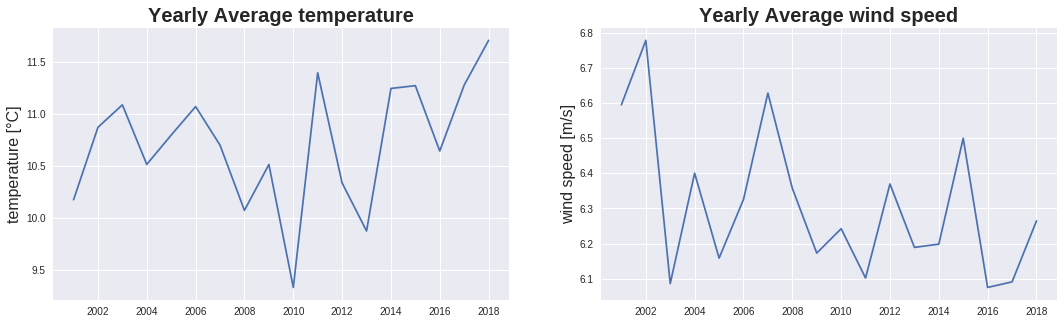

In [5]:
# plot yearly average
yearly_df = merra_df.resample("AS").mean()


plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.plot(yearly_df.index, yearly_df["temp_avg_50m"])
plt.title("Yearly Average temperature", fontweight="bold", size=20)
plt.ylabel("temperature [°C]", size=16)

plt.subplot(1, 2, 2)
plt.plot(yearly_df.index, yearly_df["ws_avg_50m"])
plt.title("Yearly Average wind speed", fontweight="bold", size=20)
plt.ylabel("wind speed [m/s]", size=16)

plt.show()

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special

In [30]:
#source: https://plot.ly/python/range-slider/

trace = go.Scatter(x=list(merra_df.index),
                   y=list(merra_df["temp_avg_50m"]))

data = [trace]
layout = dict(
    title='Time series with range slider and selectors',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

/usr/local/lib/python3.6/dist-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


/usr/local/lib/python3.6/dist-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



## 1.2 Import ERA DATA

In [0]:
# importing
path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/"
filename = "ERA5_N48.196702_E001.60000.txt"
file_path = path + filename

era_df = pd.read_csv(file_path, 
                     sep = r"	", 
                     skiprows= 32,
                     index_col='TimeStamp', 
                     parse_dates=True)


era_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,8,9,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MeanWindSpeedUID_10.0m|Mean wind speed|L-1.00|U75.00,DirectionUID_10.0m|Wind direction|L0.00|U360.00,Comment_10.0m,TimeStampStatus_10.0m,SampleStatus_10.0m,DataStatus_MeanWindSpeedUID_10.0m,DataStatus_DirectionUID_10.0m,MeanWindSpeedUID_100.0m|Mean wind speed|L-1.00|U75.00,DirectionUID_100.0m|Wind direction|L0.00|U360.00,Comment_100.0m,...,DataStatus_MeanWindSpeedUID_100.0m,DataStatus_DirectionUID_100.0m,TemperatureUID_2.0m|Temperature|L-50.00|U60.00,PressureUID_2.0m|Pressure|L800.00|U1500.00,Comment_2.0m,TimeStampStatus_2.0m,SampleStatus_2.0m,DataStatus_TemperatureUID_2.0m,DataStatus_PressureUID_2.0m,Unnamed: 22
TimeStamp,,,,,,,,,,,,,,,,,,,,,
NaT,[m/s],[Degrees],NaN,NaN,NaN,NaN,NaN,[m/s],[Degrees],NaN,...,NaN,NaN,[Deg C],[hPa],NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01 00:00:00,7.17,183.1,NaN,0.0,0.0,0.0,0.0,11.67,185.3,NaN,...,0.0,0.0,2.8,987.0,NaN,0.0,0.0,0.0,0.0,NaN
2001-01-01 01:00:00,7.16,186.1,NaN,0.0,0.0,0.0,0.0,12.00,188.9,NaN,...,0.0,0.0,2.9,986.1,NaN,0.0,0.0,0.0,0.0,NaN
2001-01-01 02:00:00,7.69,187.5,NaN,0.0,0.0,0.0,0.0,12.73,190.3,NaN,...,0.0,0.0,3.6,985.3,NaN,0.0,0.0,0.0,0.0,NaN
2001-01-01 03:00:00,7.87,186.8,NaN,0.0,0.0,0.0,0.0,13.08,190.2,NaN,...,0.0,0.0,3.9,984.3,NaN,0.0,0.0,0.0,0.0,NaN


In [0]:
era_df.columns

Index(['MeanWindSpeedUID_10.0m|Mean wind speed|L-1.00|U75.00',
       'DirectionUID_10.0m|Wind direction|L0.00|U360.00', 'Comment_10.0m',
       'TimeStampStatus_10.0m', 'SampleStatus_10.0m',
       'DataStatus_MeanWindSpeedUID_10.0m', 'DataStatus_DirectionUID_10.0m',
       'MeanWindSpeedUID_100.0m|Mean wind speed|L-1.00|U75.00',
       'DirectionUID_100.0m|Wind direction|L0.00|U360.00', 'Comment_100.0m',
       'TimeStampStatus_100.0m', 'SampleStatus_100.0m',
       'DataStatus_MeanWindSpeedUID_100.0m', 'DataStatus_DirectionUID_100.0m',
       'TemperatureUID_2.0m|Temperature|L-50.00|U60.00',
       'PressureUID_2.0m|Pressure|L800.00|U1500.00', 'Comment_2.0m',
       'TimeStampStatus_2.0m', 'SampleStatus_2.0m',
       'DataStatus_TemperatureUID_2.0m', 'DataStatus_PressureUID_2.0m',
       'Unnamed: 22'],
      dtype='object')

In [0]:
# columns selection and renaming
selection = ['MeanWindSpeedUID_10.0m|Mean wind speed|L-1.00|U75.00', 
             'DirectionUID_10.0m|Wind direction|L0.00|U360.00',
             'MeanWindSpeedUID_100.0m|Mean wind speed|L-1.00|U75.00',
             'DirectionUID_100.0m|Wind direction|L0.00|U360.00',
             'TemperatureUID_2.0m|Temperature|L-50.00|U60.00'         
            ]


era_df = era_df.loc["2001-01-01 00:00:00":, selection]
era_df.index.names = ["time_stamp"]
era_df.columns = ["ws_avg_10m", 
                   "dir_agv_10m", 
                   "ws_avg_100m", 
                   "dir_agv_100m",  
                   "temp_avg_2m"]

era_df = era_df.apply(pd.to_numeric, errors='coerce')
era_df.head()

,ws_avg_10m,dir_agv_10m,ws_avg_100m,dir_agv_100m,temp_avg_2m
time_stamp,,,,,
2001-01-01 00:00:00,7.17,183.1,11.67,185.3,2.8
2001-01-01 01:00:00,7.16,186.1,12.00,188.9,2.9
2001-01-01 02:00:00,7.69,187.5,12.73,190.3,3.6
2001-01-01 03:00:00,7.87,186.8,13.08,190.2,3.9
2001-01-01 04:00:00,7.85,183.6,13.02,186.4,4.5


In [0]:
era_df.describe()

,ws_avg_10m,dir_agv_10m,ws_avg_100m,dir_agv_100m,temp_avg_2m
count,157776.000000,157776.000000,157776.000000,157776.000000,157776.000000
mean,3.960144,182.592229,6.444396,182.652849,11.634492
std,1.939454,105.365883,2.898294,104.494571,7.294128
min,0.000000,0.000000,0.010000,0.000000,-16.800000
25%,2.500000,73.100000,4.430000,74.600000,6.500000
50%,3.650000,208.500000,6.230000,209.100000,11.400000
75%,5.090000,259.900000,8.140000,259.800000,16.600000
max,15.980000,359.900000,23.780000,359.900000,39.400000


## 1.3 Import wind turbine DATA 

In [0]:
# importing
path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/"
file_names =  ["CDBO_WT11_20130110-20190101.csv",
            "CDBO_WT23_20130110-20190101.csv",
            "CDBO_WT24_20130110-20190101.csv"]

li = []
for file_name in file_names:
  file_path = path + file_name
  df = pd.read_csv(file_path,
                         index_col='Date', 
                         parse_dates=True)
  df["WTG"] = file_name[5:9]
  li.append(df)


In [0]:
 wtg_df = pd.concat(li, axis=0)

In [0]:
 wtg_df.loc["2014-03-15 00:10:00",:]

,WindSpeed_Avg,WindSpeed_Std,WindDir_Abs,Prod,FirstActAlarm,Temperature,WTG
Date,,,,,,,
2014-03-15 00:10:00,6.0,1.20,251,422,0,13.0,WT11
2014-03-15 00:10:00,5.9,0.85,71,-11,188,9.0,WT23
2014-03-15 00:10:00,5.7,0.90,256,335,0,7.0,WT24


In [0]:
# renaming
wtg11_df.index.names = ["time_stamp"]
wtg11_df.columns = ["ws_avg_80m", "ws_std_80m", "dir_agv_80m", "prod_avg", 
               "first_alarm",  "temp_avg_80m"]
wtg11_df.head(3)

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m
time_stamp,,,,,,
2013-01-10 00:10:00,4.4,0.5,130,155,0,6.0
2013-01-10 00:20:00,4.0,0.4,128,101,0,6.0
2013-01-10 00:30:00,3.9,0.3,126,76,0,6.0


In [0]:
wtg11_df.dtypes

ws_avg_80m      float64
ws_std_80m      float64
dir_agv_80m       int64
prod_avg          int64
first_alarm       int64
temp_avg_80m    float64
dtype: object

In [0]:

wtg11_df = wtg11_df.loc["2014-01-01 00:00:00":"2018-12-31 23:50:00",:]

# 2.0 Exploration

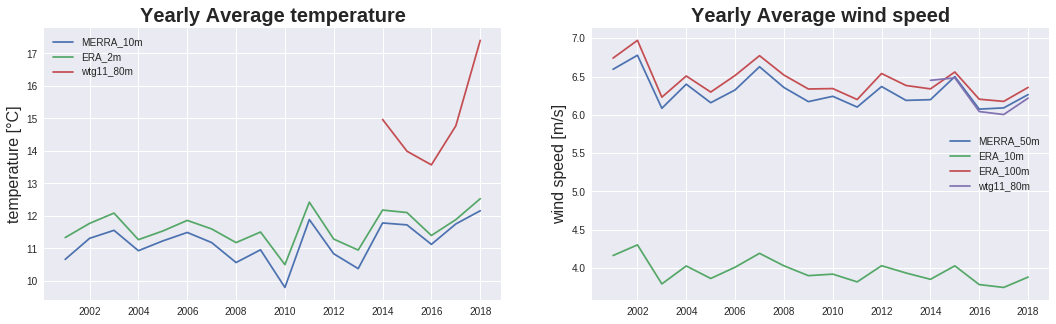

In [0]:
# plot yearly average
yearly_merra_df = merra_df.resample("AS").mean()
yearly_era_df = era_df.resample("AS").mean()
yearly_wtg11_df = wtg11_df.loc["2014-01-01 00:00:00":"2018-12-31 23:50:00",:].resample("AS").mean()


plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.plot(yearly_df.index, yearly_df["temp_avg_10m"], label="MERRA_10m")
plt.plot(yearly_era_df.index, yearly_era_df["temp_avg_2m"], label="ERA_2m")
plt.plot(yearly_wtg11_df.index, yearly_wtg11_df["temp_avg_80m"], label="wtg11_80m")
plt.title("Yearly Average temperature", fontweight="bold", size=20)
plt.ylabel("temperature [°C]", size=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(yearly_df.index, yearly_df["ws_avg_50m"], label="MERRA_50m")
plt.plot(yearly_era_df.index, yearly_era_df["ws_avg_10m"], label="ERA_10m")
plt.plot(yearly_era_df.index, yearly_era_df["ws_avg_100m"], label="ERA_100m")
plt.plot(yearly_wtg11_df.index, yearly_wtg11_df["ws_avg_80m"], label="wtg11_80m")
plt.title("Yearly Average wind speed", fontweight="bold", size=20)
plt.ylabel("wind speed [m/s]", size=16)
plt.legend()

plt.show()

In [0]:
def recovery_table(df, feature, title="recovery rate "):
  """plot recovery rate for each day
  - df: Data_frame, with a date index
  - feature: string, target feature name for recovery rate count
  """
  
  # inputs
  title = title + feature
  YM = df.index.map(lambda x: 100*x.year + x.month)
  d = df.index.day.values
  mat = df.pivot_table(index=YM, columns=d, 
                             aggfunc={feature: "count"}, dropna=True)

  # plot
  plt.figure(figsize=(18,35))
  sns.heatmap(mat, square=True, annot=True, fmt='g', linewidths=.5, 
              cmap= "PiYG", cbar=False)
  plt.title(title, fontweight="bold", size=20)
  plt.xlabel('day')
  plt.ylabel('year_month');
  plt.show()

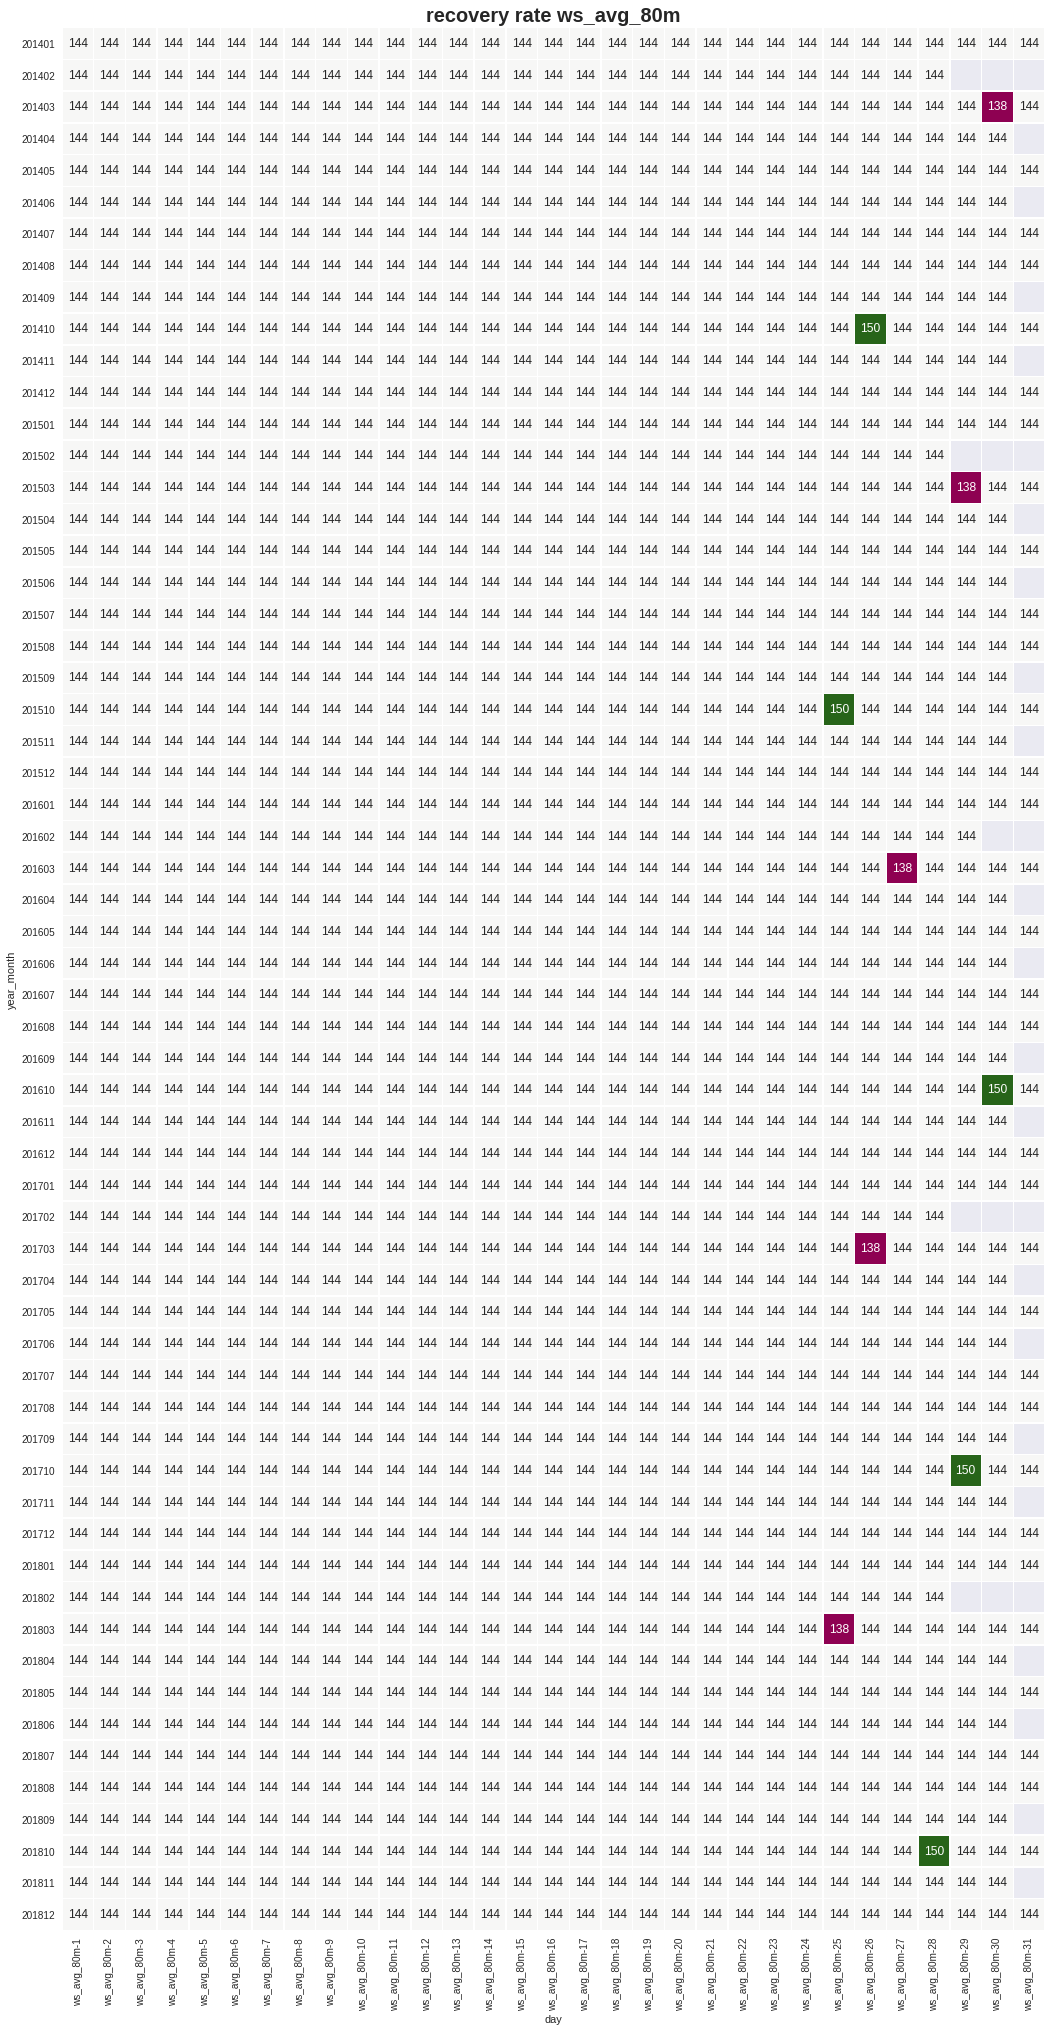

In [0]:
 recovery_table(wtg11_df, "ws_avg_80m")

We can see that:

*   Good recovery rate (no missing data)
*   All november have one days with 150 "10min records" (max at 144 for one day)
*   All October have one days with 138 "10min records".

This match the summer/winter local time change in France.  
This will need to be converted in order to be aligned with UTM.

In [0]:
# convert local wtg local time to GMT 
ts = pd.Series(wtg11_df.index)
ts_GTM = ts.dt.tz_localize("Europe/Paris",ambiguous = 'infer').dt.tz_convert("GMT")
wtg11_df.index = ts_GTM
del ts, ts_GTM

In [0]:
wtg11_df.head()

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m
time_stamp,,,,,,
2013-12-31 23:00:00+00:00,7.1,0.70,136,643,0,13.5
2013-12-31 23:10:00+00:00,7.1,0.80,135,625,0,13.0
2013-12-31 23:20:00+00:00,7.7,0.85,138,805,0,13.0
2013-12-31 23:30:00+00:00,7.9,0.75,139,852,0,13.0
2013-12-31 23:40:00+00:00,8.0,0.70,135,841,0,13.0


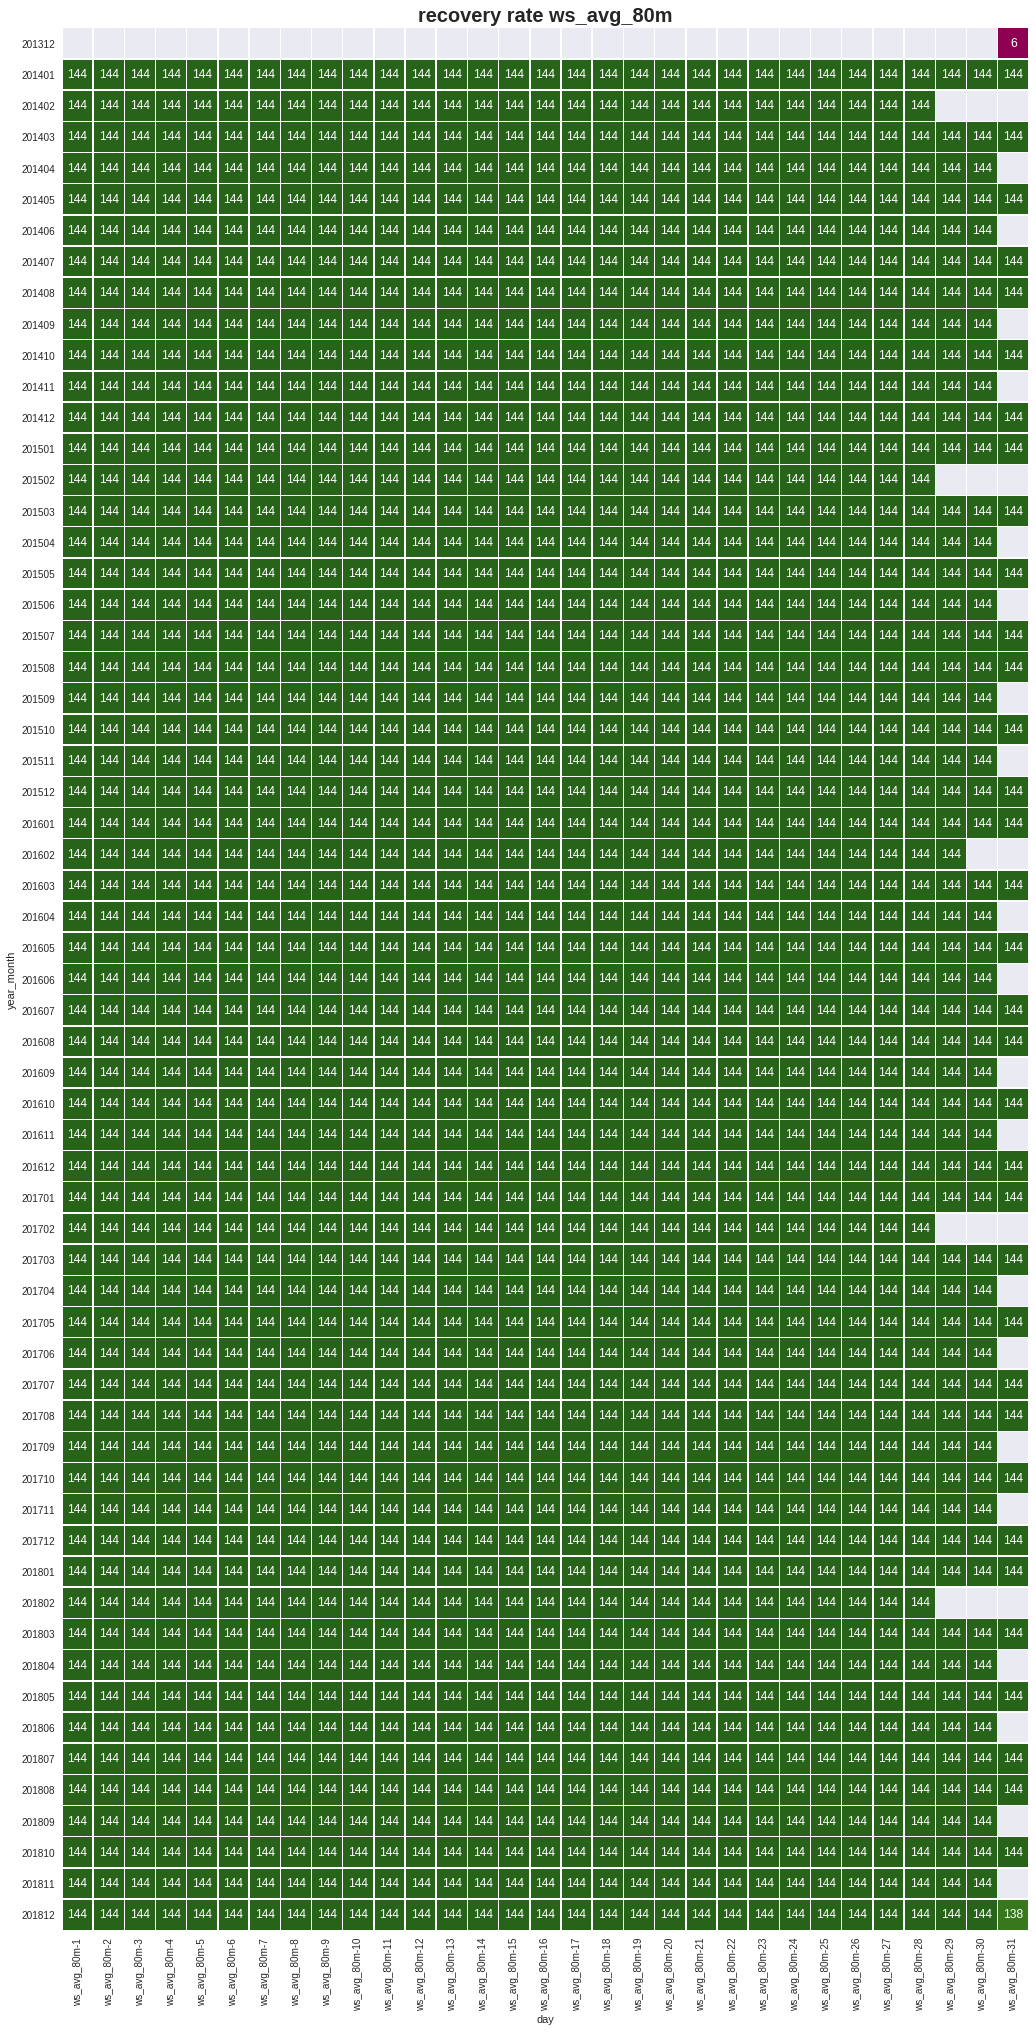

In [0]:
 recovery_table(wtg11_df, "ws_avg_80m")

In [0]:
wtg11_df["month"] = wtg11_df.index.map(lambda x: x.month)
wtg11_df["year"] = wtg11_df.index.map(lambda x: x.year)

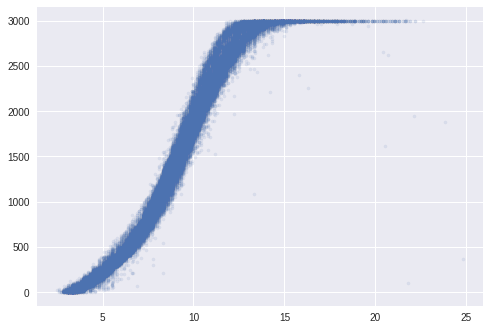

In [0]:
mask1 = wtg11_df.loc[:, 'first_alarm'] == 0
mask2 = wtg11_df.loc[:, 'year'].isin([2014])
mask2 = wtg11_df.loc[:, 'month'].isin([12, 1, 2])
mask3 = (wtg11_df.loc[:, 'prod_avg'] > 0)

mask = mask1 & mask2 & mask3 

plt.scatter('ws_avg_80m', 'prod_avg', data=wtg11_df.loc[mask,:], alpha = 0.1, s=10)

In [0]:
#Filtre
wtg11_df["hour"] = wtg11_df.index.map(lambda x: x.hour)
wtg11_df["filter"] = 0


,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m,month,year,hour
time_stamp,,,,,,,,,
2013-12-31 23:00:00+00:00,7.1,0.70,136,643,0,13.5,12,2013,23
2013-12-31 23:10:00+00:00,7.1,0.80,135,625,0,13.0,12,2013,23
2013-12-31 23:20:00+00:00,7.7,0.85,138,805,0,13.0,12,2013,23
2013-12-31 23:30:00+00:00,7.9,0.75,139,852,0,13.0,12,2013,23
2013-12-31 23:40:00+00:00,8.0,0.70,135,841,0,13.0,12,2013,23


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


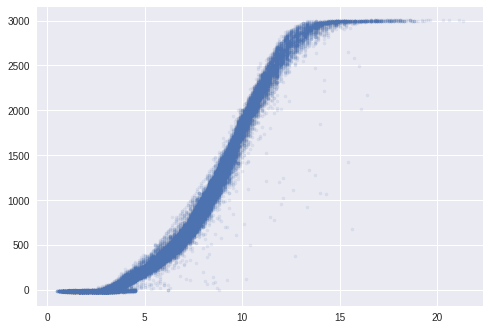

In [0]:
# Filter
wtg11_df["filter"] = 0

# filter bad data: 
mask1 = wtg11_df.loc[:,"first_alarm"] != 0
mask2 = (wtg11_df.loc[:, 'prod_avg'] < 0)*(wtg11_df.loc[:, "ws_avg_80m"] > 4.5)
mask = mask1 & mask2
wtg11_df.loc[mask, "filter"] = 1
mask5 = wtg11_df.loc[:, "filter"] == 0

# time filter for plot
mask3 = wtg11_df.loc[:, 'year'].isin([2015])
mask4 = wtg11_df.loc[:, 'month'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

mask =  mask3 & mask4 & mask5

plt.scatter('ws_avg_80m', 'prod_avg', data=wtg11_df.loc[mask,:], alpha = 0.1, s=10)

In [0]:
wtg11_df.head()

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m,month,year,hour,filter
time_stamp,,,,,,,,,,
2013-12-31 23:00:00+00:00,7.1,0.70,136,643,0,13.5,12,2013,23,0
2013-12-31 23:10:00+00:00,7.1,0.80,135,625,0,13.0,12,2013,23,0
2013-12-31 23:20:00+00:00,7.7,0.85,138,805,0,13.0,12,2013,23,0
2013-12-31 23:30:00+00:00,7.9,0.75,139,852,0,13.0,12,2013,23,0
2013-12-31 23:40:00+00:00,8.0,0.70,135,841,0,13.0,12,2013,23,0


In [0]:
# create event_description dictionnary

path = "/content/gdrive/My Drive/Colab Notebooks/wind_power/data/"
filename = "adm_braking_list.csv"
file_path = path + filename
                       
break_list = pd.read_csv(file_path)
event_desc = pd.Series(break_list.event_description,
                       index=break_list.event_code.values).to_dict()

del break_list

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


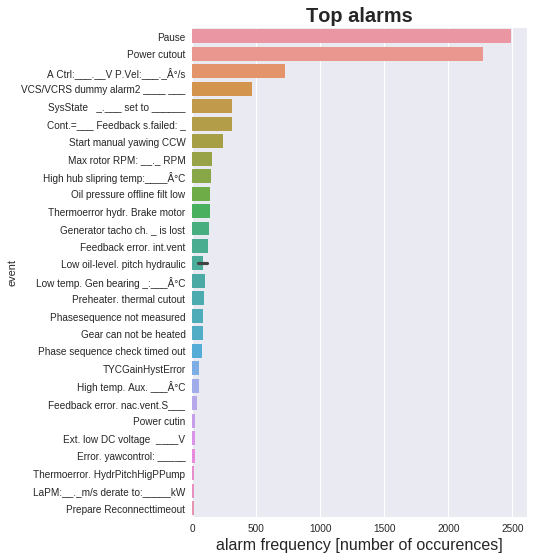

In [0]:
# First fault

top_n = 30

# inputs
A = wtg11_df.loc[:,"first_alarm"].value_counts()
A = pd.DataFrame(A)
A = A.rename(index=str, columns={"first_alarm": "count"})
A["event"] = A.index.map(lambda x: event_desc[int(x)])
A.head()


# plot
plt.figure(figsize=(6, 9))
sns.barplot(x= "count", y= "event", data=A.iloc[1:top_n,:])
plt.title("Top alarms", fontweight="bold", size=20)
plt.xlabel("alarm frequency [number of occurences]", size=16)
plt.show()

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go


data = [go.Scatter(
          x=wtg11_df.index,
          y=wtg11_df['ws_avg_80m'])]

py.iplot(data)

/usr/local/lib/python3.6/dist-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: ignored

In [0]:


mask1 = wtg11_df.loc[:, 'ws_avg_80m'] > 6
mask2 = wtg11_df.loc[:, 'prod_avg'] < 250
mask = mask1 & mask2
wtg11_df.loc[mask,:].head(50)

,ws_avg_80m,ws_std_80m,dir_agv_80m,prod_avg,first_alarm,temp_avg_80m
time_stamp,,,,,,
2014-02-01 08:30:00+00:00,6.4,0.75,142,158,0,17.0
2014-02-01 08:40:00+00:00,6.6,0.55,142,218,0,17.0
2014-02-07 04:30:00+00:00,23.4,2.95,150,-15,0,16.5
2014-02-07 04:40:00+00:00,21.8,2.95,150,103,0,16.5
2014-02-10 12:50:00+00:00,7.7,0.95,154,-15,0,16.3
2014-02-10 13:00:00+00:00,8.1,0.90,154,-12,0,16.3
2014-02-10 13:10:00+00:00,9.2,1.20,154,-8,0,16.3
2014-02-10 13:20:00+00:00,10.2,1.45,154,-5,0,16.3
2014-02-10 13:30:00+00:00,9.3,1.55,154,-7,0,16.3


In [0]:
True * False

0

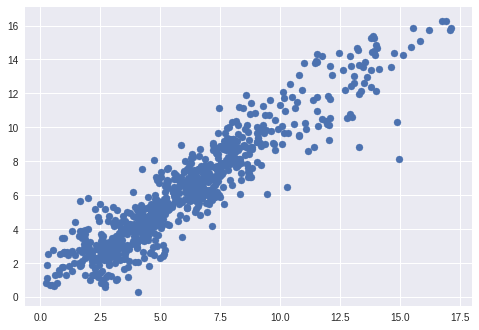

In [0]:
X = merra_df.loc["2013-01-01":"2013-02-01", "ws_avg_50m"]
Y = era_df.loc["2013-01-01":"2013-02-01", "ws_avg_100m"]

plt.scatter(X,Y)
  

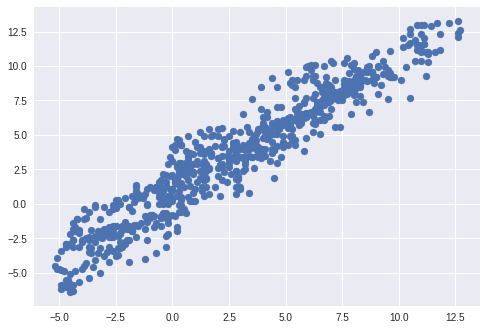

In [0]:
X = merra_df.loc["2013-01-01":"2013-02-01", "temp_avg_10m"]
Y = era_df.loc["2013-01-01":"2013-02-01", "temp_avg_2m"]

plt.scatter(X,Y)
  

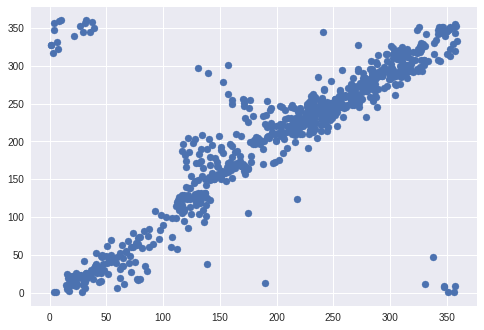

In [0]:
# direction

X = merra_df.loc["2013-01-01":"2013-02-01", "dir_agv_50m"]
Y = era_df.loc["2013-01-01":"2013-02-01", "dir_agv_100m"]

plt.scatter(X,Y)
  